## Main Mega Project File
Analisis Tweet yang mengandung berbagai kata dengan konteks islam. Tujuan awal saya membuat file ini adalah untuk mengetahui sentiment tweet yang ada pada twitter terhadap kata muslim. Selain itu, saya juga bertujuan untuk mencari kata yang sering dipadankan pada tweet berbau islam. Tujuan utama saya adalah ingin mengetahui seberapa tinggi / sering islam dibicarakan, dan bagaimana sentiment yang ada pada tweet tersebut. Akan tetapi, pada kesempatan awal ini, saya hanya akan menggunakan sekitar 20000 data dengan keywords muslim.

Saya harap dengan adanya analisis ini, saya dapat berbagai pengetahuan mengenai pandangan dunia (khususnya warga twitter) terhadap muslimin / islam. Saya tahu bahwa data yang saya gunakan tergolong kecil, namun saya berniat untuk menambah datanya sedikit demi sedikit. Juga, semoga saya dapat menemukan celah dan "something" untuk dieksekusi.

Pada file ini, kita akan melakukan beberapa hal terhadap data yang sudah kita scrapping. Data yang akan digunakan adalah data dari twit sebanyak 20000 dari twitter menggunakan api twint. 20000 baris data tersebut merupakan data dengan kandungan kata "muslim" dan merupakan 20000 twit terakhir.

### Data Cleaning
Data akan dibersihkan terlebih dahulu karena kita belum membutuhkan kebanyakan kolom yang tersedia. Seperti kolom id, urls, dsb. Pada proses ini saya akan membagi-baginya menjadi beberapa fungsi agar lebih mudah untuk dilihat.

In [1]:
# unhash kode program ini jika belum mempunyai stopwords atau vader_lexicon sesuai kebutuhan (english)

import nltk 
# nltk.download('stopwords')
# nltk.download('vader_lexicon')

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import itertools
import collections

from nltk.corpus import stopwords

warnings.filterwarnings('ignore')
%matplotlib inline

sns.set_style("whitegrid")

In [3]:
# fungsi ini berguna untuk membuang kolom sesuai dengan kebutuhan kita

def drop_columns(df):
    base_col = [
        'created_at', 
        'date', 
        'time', 
        'username', 
        'tweet', 
        'language', 
        'replies_count', 
        'retweets_count',
        'likes_count',
        'hashtags',
        'user_id',
        'conversation_id'
        
    ]
    drop_col = diff(df.columns, base_col)
    df_drop = df.drop(drop_col, axis = 1)
    return df_drop

In [4]:
#fungsi ini berfungsi sebagai pencari difference antar 2 list

def diff(list1, list2):
    c = set(list1).union(set(list2))  # or c = set(list1) | set(list2)
    d = set(list1).intersection(set(list2))  # or d = set(list1) & set(list2)
    return list(c - d)

In [5]:
#fungsi yang akan memfilter dataset untuk bahasa tertentu saja

def lang_only(df, lang):
    df_lang = df[df['language'] == lang]
    return df_lang

In [6]:
#fungsi ini berfungsi untuk splitting data pada kolom created_at karena kita mungkin butuh tempat dimana  tweet tersebut dijalankan

def created_at_split(df):
    df_splitted = df.copy()
    df_splitted['region'] = df_splitted['created_at'].apply(lambda x : x.split()[2])
    return df_splitted

In [7]:
#Fungsi ini berguna untuk menjalankan fungsi-fungsi di atas tersebut

def pipeline(df):
    df = drop_columns(df)
    df = lang_only(df, 'en')    
    df = created_at_split(df)
    return df

In [11]:
cwd = os.getcwd()
data_path = os.path.join(cwd, 'databases', 'store_twit_muslim.csv')

df = pd.read_csv(data_path)
df_copy = df.copy()

df_copy.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.620000e+18,1.620000e+18,2023-02-10 19:59:36 SE Asia Standard Time,2/10/2023,19:59:36,700,1.400000e+18,bmidou124,SriVaishnava Alucard (परकालरामानुजदासन),NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1.620000e+18,1.620000e+18,2023-02-10 19:59:34 SE Asia Standard Time,2/10/2023,19:59:34,700,6.535429e+07,khasbaat,arijit ghosh,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1.620000e+18,1.620000e+18,2023-02-10 19:59:33 SE Asia Standard Time,2/10/2023,19:59:33,700,1.060000e+18,vasudaiva,Vasudaiva_Kutumbakam 🕉️🛕🪷🐅,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'zafshee2', 'name': 'SheenA Z...",NaN,NaN,NaN,NaN
3,1.620000e+18,1.620000e+18,2023-02-10 19:59:30 SE Asia Standard Time,2/10/2023,19:59:30,700,8.590000e+17,mr_muslim511,Slim,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1.620000e+18,1.620000e+18,2023-02-10 19:59:29 SE Asia Standard Time,2/10/2023,19:59:29,700,1.620000e+18,rajeshc40075742,Rajesh ch,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'bandisanjay_bjp', 'name': 'B...",NaN,NaN,NaN,NaN


In [12]:
df_copy.shape

(20004, 36)

In [13]:
df_copy.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [14]:
df['language'].unique()

array(['en', 'et', 'in', 'ar', 'fr', 'tl', 'hi', 'sv', 'und', 'ps', 'ur',
       'kn', 'zxx', 'ro', 'cy', 'tr', 'qme', 'ja', 'de', 'ca', 'am', 'bn',
       'es', 'ht', 'ta', 'qam', 'da', 'fa', 'no', 'qht', 'pl', 'nl', 'pt',
       'gu', 'it', 'fi', 'art', 'te', 'qst', 'sl', 'is', 'mr', 'si', 'zh',
       'lv', 'ckb', 'cs', 'eu', 'lt', 'th'], dtype=object)

<AxesSubplot: xlabel='count', ylabel='language'>

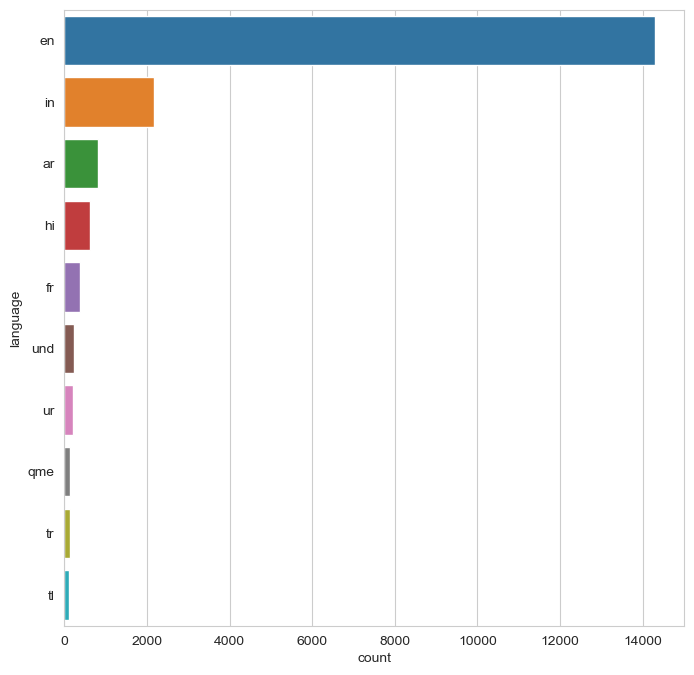

In [16]:
fig, ax = plt.subplots(1,1, figsize = (8,8))

sns.countplot(data = df, y = 'language', ax = ax, order = df['language'].value_counts().iloc[:10].index)

Berdasarkan plot tersebut, kita mungkin hanya memerlukan bahasa en saja mengingat mungkin bahasa tersebut yang mungkin dapat dibaca. Selain itu, bahasa tersebut menunjukkan banyak jumlah yang timpang dengan yang lain. Seharusnya kita dapat langsung memfilter dari twint sendiri, namun sepertinya ada bug di library twint tersebut.

In [15]:
df_copy[df_copy.duplicated()]

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest


Terlihat bahwa tidak ada tweet yang terduplikasi

In [17]:
df_copy = pipeline(df_copy)

In [64]:
df_copy.head()

,conversation_id,created_at,date,time,user_id,username,tweet,language,replies_count,retweets_count,likes_count,hashtags,region,sentiment_score,sentiment
0,1.620000e+18,2023-02-10 19:59:36 SE Asia Standard Time,2/10/2023,19:59:36,1.400000e+18,bmidou124,i am pretty sure muslims of those era didnt ta...,en,0,0,0,[],SE,0.6017,pos
1,1.620000e+18,2023-02-10 19:59:34 SE Asia Standard Time,2/10/2023,19:59:34,6.535429e+07,khasbaat,pdp amp especially apc insist the christian ob...,en,0,0,0,[],SE,-0.6852,neg
2,1.620000e+18,2023-02-10 19:59:33 SE Asia Standard Time,2/10/2023,19:59:33,1.060000e+18,vasudaiva,zafshee2 minicnair did i mention he was muslim...,en,0,0,0,[],SE,0.0000,neu
3,1.620000e+18,2023-02-10 19:59:30 SE Asia Standard Time,2/10/2023,19:59:30,8.590000e+17,mr_muslim511,twitter blue,en,0,0,0,[],SE,0.0000,neu
5,1.620000e+18,2023-02-10 19:59:29 SE Asia Standard Time,2/10/2023,19:59:29,4.240572e+08,ashish40411,modis outreach to bohra muslims opens arabic a...,en,0,0,0,[],SE,0.2732,pos


In [19]:
df_copy.region.unique()

array(['SE'], dtype=object)

Berdasarkan informasi di atas, kita dapat mengetahui bahwa data tweet yang kita gunakan hanya terdiri dari user yang ada di southeast

#### Analysis Tweet
Pada bagian ini, akan dilakukan beberapa visualisasi dan analisis dari tweet-tweet yang telah kita scrap.

In [8]:
def highest_tweets(df_copy, col, limit):
    df_copy_sum = pd.DataFrame(df_copy.groupby('username')[[col, 'user_id']].sum()).sort_values(by = [col], ascending = False)
    
    highest_tweet = df_copy_sum.iloc[:limit]

    sns.barplot(data = highest_tweet, y = highest_tweet.index, x = col, orient = 'h')
    
    return highest_tweet

In [9]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [10]:
def words_count(df):
    words = []
    
    #menghapus segala bentuk huruf yang tidak diinginkan
    df['tweet'] = df['tweet'].apply(lambda x : remove_url(x))

    
    #mengubah tiap kata pada tweet menjadi huruf kecil
    df['tweet'] = df['tweet'].apply(lambda x : x.lower())
    
    #melakukan splitting word pada tiap tweet 
    words.append(df_copy['tweet'].apply(lambda x : x.split()))
    
    words = list(np.array(words).flatten())
    
    all_words = itertools.chain(*words)
    
    count_worlds = collections.Counter(all_words)
    
    return count_worlds


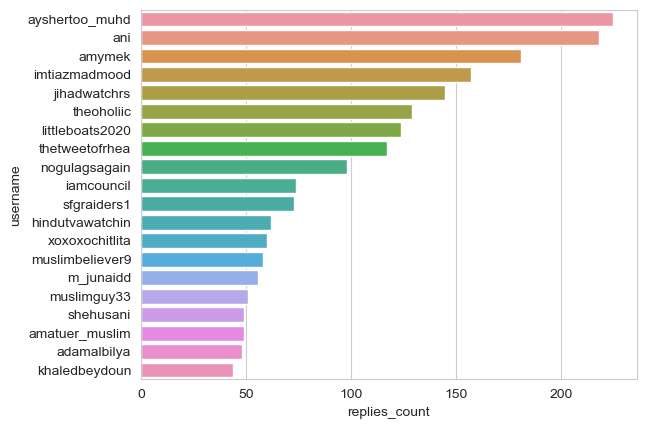

In [20]:
top_user_id = []

top_user_id.append(highest_tweets(df_copy, 'replies_count', 20))

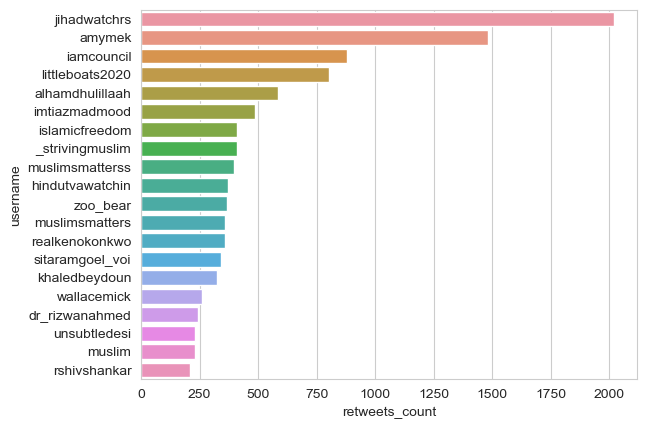

In [21]:
top_user_id.append(highest_tweets(df_copy, 'retweets_count', 20))


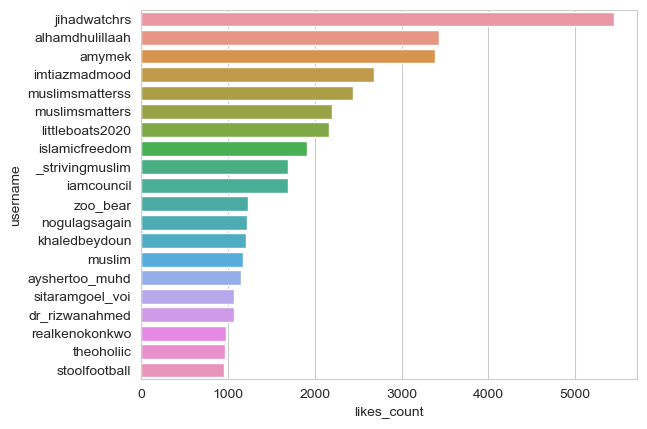

In [22]:
top_user_id.append(highest_tweets(df_copy, 'likes_count', 20))


In [23]:
df[df['user_id'] == df['user_id'][0]].username.value_counts()

_elonmuslim        9
setiawa98888547    6
gatty_gautham      6
shakeshakabrah     4
sonsuzs06563724    3
                  ..
tweetwitharsh      1
kamuyanganjing     1
itanveerhussain    1
mozatoelygaya      1
meenat30           1
Name: username, Length: 124, dtype: int64

In [62]:
all_words = words_count(df_copy)
key_words = ['muslims', 'muslim']
common_words = ['would']

stops = list(stopwords.words('english'))
stops += key_words + common_words


In [25]:
main_words = np.array([[word, int(all_words[word])] for word in all_words if word not in stops])
counts = main_words[:, 1].astype('int')

counts

array([ 67, 119,  19, ...,   1,   1,   1])

In [26]:
main_words = pd.DataFrame({
    'words' : main_words[:, 0],
    'counts' : counts
})

<AxesSubplot: xlabel='words', ylabel='counts'>

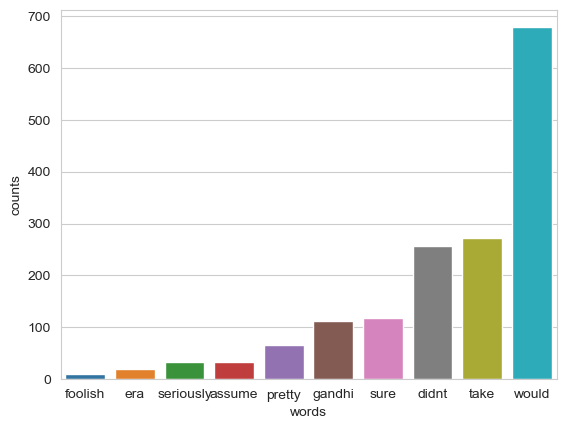

In [65]:
sns.barplot(data = main_words[:10].sort_values('counts'), x = 'words', y = 'counts')

In [29]:
from nltk.sentiment import SentimentIntensityAnalyzer
import operator

sia = SentimentIntensityAnalyzer()
df_copy["sentiment_score"] = df_copy["tweet"].apply(lambda x: sia.polarity_scores(x)["compound"])
df_copy["sentiment"] = np.select([df_copy["sentiment_score"] < 0, df_copy["sentiment_score"] == 0, df_copy["sentiment_score"] > 0],
                           ['neg', 'neu', 'pos'])

In [53]:
df_copy['sentiment']

0        pos
1        neg
2        neu
3        neu
5        pos
        ... 
19998    pos
19999    pos
20000    neg
20002    pos
20003    neg
Name: sentiment, Length: 14291, dtype: object

In [50]:
df_copy["sentiment"].value_counts()

pos    5868
neg    5718
neu    2705
Name: sentiment, dtype: int64

<AxesSubplot: xlabel='sentiment', ylabel='count'>

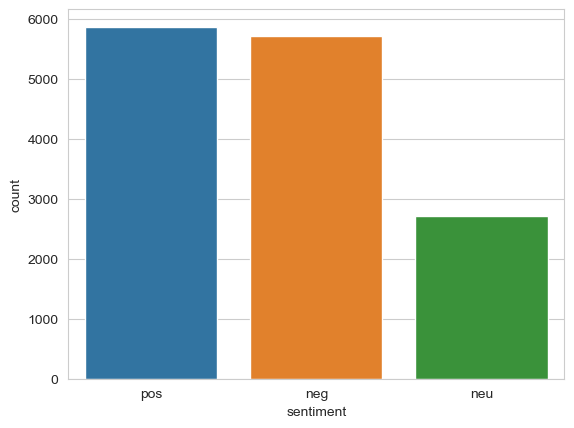

In [58]:
sns.countplot(data = df_copy, x = 'sentiment')

In [147]:
df_most_id = pd.DataFrame(df_copy.groupby(['user_id', 'username'])['user_id'].count())
df_most_id['index'] = df_most_id.index
df_most_id['user_id_counts'] = df_most_id['index'].apply(lambda x : x[0])
df_most_id['username'] = df_most_id['index'].apply(lambda x : x[1])
df_most_id.drop(columns = ['index'], inplace = True)
df_most_id.index = np.arange(len(df_most_id))
df_most_id.rename(columns = {'user_id' : 'user_id_counts', 'user_id_counts' : 'user_id' }, inplace = True)

df_most_id_sorted = df_most_id.sort_values(by = ['user_id_counts'], ascending = False).iloc[:20]
df_most_id_sorted

,user_id_counts,user_id,username
2810,124,3.067395e+09,mohammadfahim68
8904,81,1.570000e+18,xoxoxochitlita
8334,77,1.540000e+18,theoholiic
7270,72,1.480000e+18,muslimguy33
3410,70,7.840000e+17,sfgraiders1
4291,52,1.050000e+18,amatuer_muslim
7442,50,1.490000e+18,muslimbeliever9
8087,35,1.530000e+18,darkso54158114
5640,27,1.310000e+18,cryptowave23
5764,24,1.320000e+18,osuhsr


In [159]:
df_most_id2 = pd.DataFrame(df_copy.groupby(['user_id', 'sentiment'])['tweet'].count()).sort_values('tweet', ascending = False).iloc[:30]
df_most_id2

tweet
user_id      sentiment       
1.590000e+18 neg          231
             pos          212
1.600000e+18 pos          206
             neg          205
1.610000e+18 pos          160
             neg          156
1.570000e+18 pos          152
             neg          139
1.580000e+18 pos          134
1.620000e+18 pos          133
1.520000e+18 pos          126
             neg          122
1.580000e+18 neg          121
1.540000e+18 neg          117
             pos          110
1.590000e+18 neu          110
1.490000e+18 neg          108
             pos          104
1.560000e+18 neg          104
1.550000e+18 neg          102
1.480000e+18 pos          101
1.530000e+18 neg           99
1.560000e+18 pos           94
1.500000e+18 pos           88
1.600000e+18 neu           87
1.620000e+18 neg           86
1.550000e+18 pos           84
1.510000e+18 pos           84
1.480000e+18 neg           83
1.510000e+18 neg           81

Berdasarkan table ini, terdapat sebuah fakta menarik bahwa ada user yang melakukan tweet dengan banyak tweet bernilai positif sama dengan tweet bernilai negatif. Hal ini menarik, mengingat user tersebut adalah user yang sama, dan memungkinkan dengan username yang berbeda. Hal ini mungkin mengindikasikan adanya double face pada user-user tersebut.

In [161]:
df_most_id3 = pd.DataFrame(df_copy.groupby(['username', 'sentiment'])['tweet'].count()).sort_values('tweet', ascending = False).iloc[:30]
df_most_id3

tweet
username        sentiment       
mohammadfahim68 pos           72
                neg           37
muslimguy33     neu           35
theoholiic      neg           33
sfgraiders1     neg           33
xoxoxochitlita  pos           31
sfgraiders1     pos           29
xoxoxochitlita  neu           29
darkso54158114  neg           26
amatuer_muslim  neg           25
                pos           24
theoholiic      pos           24
osuhsr          pos           24
xoxoxochitlita  neg           21
muslimbeliever9 neu           21
mosque24584412  pos           20
muslimguy33     pos           20
theoholiic      neu           20
muslimbeliever9 pos           18
muslimguy33     neg           17
nikah_worldwide pos           16
mohammadfahim68 neu           15
stephan66899980 neg           15
possibly_miriam pos           14
fajrdawn1       neg           14
dinganga44      neg           13
fahim_venus     pos           12
muslimmissworld neg           12
dana34721337    pos           12
muslimbeliever9 neg           11

In [179]:
df_mohammadfahim68 = df_copy[df_copy['username'] == 'mohammadfahim68'][['tweet', 'sentiment']]
df_mohammadfahim68['sentiment'].value_counts()

pos    72
neg    37
neu    15
Name: sentiment, dtype: int64

In [177]:
df_mohammadfahim68[df_mohammadfahim68['sentiment'] == 'neg']

,tweet,sentiment
2166,hadith prophetmuhammad pbuh said o allah i see...,neg
2616,o allah i ask you o allah the one the eternal ...,neg
3059,quran quranhour quranthedivinebook surely alla...,neg
5072,hadith hadithoftheday prophetmuhammad pbuh sai...,neg
5851,hadith hadithoftheday prophetmuhammad pbuh sai...,neg
5889,hadith hadithoftheday prophetmuhammad pbuh sai...,neg
5893,hadith hadithoftheday prophetmuhammad pbuh sai...,neg
5894,quran quranhour quranthedivinebook qurantime q...,neg
5895,o allah i seek refuge with you from unbearable...,neg
6176,o allah i seek refuge in you from a sadness th...,neg
